#[1. Getting Started](https://quantopian-doc.readthedocs.io/ja/latest/tutorial/index.html)



### [1.1. 取引アルゴリズムとは？](https://quantopian-doc.readthedocs.io/ja/latest/tutorial/1_getting_started_lesson1.html)

1. 過去のデータについて数学的、統計的に分析
1. 分析に基づいてモデル作成
1. 取引の意思決定をするコンピュータプログラムを書く



### [1.2. 何から始めればいいですか？](https://quantopian-doc.readthedocs.io/ja/latest/tutorial/1_getting_started_lesson1.html#id2)

+ Quantopian Researchで、過去データ分析
    + データはQuantoppianが用意しているこのJupyterNotebook環境を使えば無料で使える
    + ローカルPCではアクセス不可
    

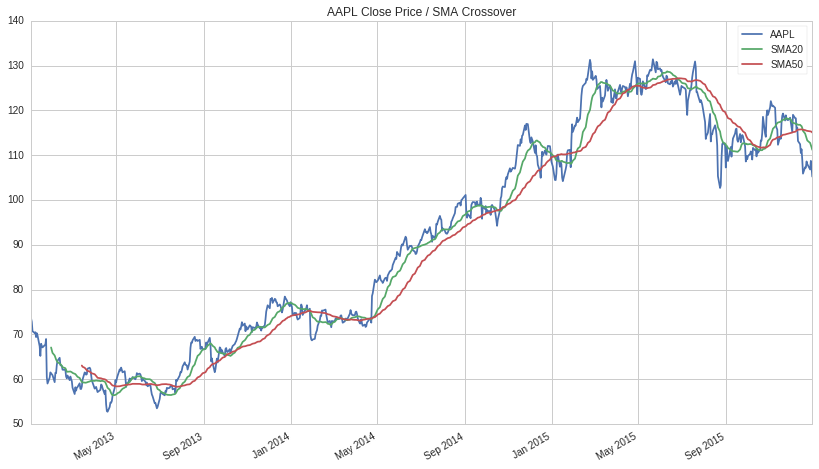

In [1]:
from quantopian.research import prices, symbols
import pandas as pd

# AAPL の過去の価格データを取得する
aapl_close = prices(
    assets=symbols('AAPL'),
    start='2013-01-01',
    end='2016-01-01',
)

# AAPL の価格データより20日と50日の移動平均を算出する
aapl_sma20 = aapl_close.rolling(20).mean()
aapl_sma50 = aapl_close.rolling(50).mean()

# 結果を結合して pandas の DataFrameに入れ、描画する
pd.DataFrame({
    'AAPL': aapl_close,
    'SMA20': aapl_sma20,
    'SMA50': aapl_sma50
}).plot(
    title='AAPL Close Price / SMA Crossover'
);

### [1.3. データを探す](https://quantopian-doc.readthedocs.io/ja/latest/tutorial/1_getting_started_lesson2.html)

+ Quantopianには2002年〜今日現在までの、8000株以上の米国株データを用意してある
+ 分足と日足
    + 注意：後ほど紹介する Pipeline では日足のみ利用可
+ データは pandasの Series / DataFrame 



In [7]:
from quantopian.research import returns, symbols

# 時間範囲を指定
period_start = '2014-01-01'
period_end = '2014-12-31'

# 上記の時間範囲で、AAPLのリターンデータを照会する
aapl_returns = returns(
    assets=symbols('AAPL'), 
    #assets=symbols(['AAPL', "FB"]), 
    start=period_start,
    end=period_end,
)

# 最初の10行のみ表示
aapl_returns.head(10)

,Equity(24 [AAPL]),Equity(42950 [FB])
2014-01-02 00:00:00+00:00,-0.014137,0.001098
2014-01-03 00:00:00+00:00,-0.022027,-0.002924
2014-01-06 00:00:00+00:00,0.005376,0.048021
2014-01-07 00:00:00+00:00,-0.007200,0.013116
2014-01-08 00:00:00+00:00,0.006406,0.005179
2014-01-09 00:00:00+00:00,-0.012861,-0.017345
2014-01-10 00:00:00+00:00,-0.006674,0.012583
2014-01-13 00:00:00+00:00,0.005043,-0.035036
2014-01-14 00:00:00+00:00,0.020123,0.032552
2014-01-15 00:00:00+00:00,0.020079,-0.002252


+ [Quantopian Docs: Data Reference Overview](https://www.quantopian.com/docs/data-reference/overview)
+ 企業のファンダメンタルズやセンチメント分析、マクロ経済指標など様々なデータセットがある
+ 多数のデータにアクセスする時は `Pipeline` を使う
    + pipeline については後半に詳しく行います


### [1.4. Pipeline API](https://quantopian-doc.readthedocs.io/ja/latest/tutorial/1_getting_started_lesson3.html)

+ Pipelineとは、Quantopianで使えるデータを効率よく分析するための強力なツール
+ 基本的な使い方
    1. `Pipeline` を使ってほしいデータを挿入したり、フィルタリングしたりする
    1. `run_pipeline` に、１と評価期間を渡しデータを取得



In [10]:
from quantopian.pipeline import Pipeline

def make_pipeline():
    # 空の Pipeline を作成し返す。
    return Pipeline()
make_pipeline()

+ `Pipeline()` の中にほしいデータを追加していけばデータが取得出来る

In [12]:
from quantopian.pipeline import Pipeline
from quantopian.research import run_pipeline

# Quantopianで使える全株式データ
from quantopian.pipeline.data import USEquityPricing

def make_pipeline():
    # 日々の最終価格を取得
    close_price = USEquityPricing.close.latest

    # 上記のデータを Pipeline に入れて返す
    return Pipeline(
        columns={
            'close_price': close_price,
        }
    )

pipeline_output = run_pipeline(
    make_pipeline(),
    "2020-01-01",
    "2020-01-10",
)

In [15]:
pipeline_output.head(10)

close_price
2020-01-02 00:00:00+00:00 Equity(2 [HWM])            30.76
                          Equity(21 [AAME])           1.97
                          Equity(24 [AAPL])         293.41
                          Equity(25 [HWM_PR])        89.70
                          Equity(41 [ARCB])          27.60
                          Equity(52 [ABM])           37.71
                          Equity(53 [ABMD])         170.58
                          Equity(62 [ABT])           86.84
                          Equity(64 [GOLD])          18.58
                          Equity(66 [AB])            30.25

+ **Pipelineでできること**
    + 色々なデータにアクセス
        + 日々のClose
        + stocktwitsのセンチメントデータ（注：２０２０年５月までしかない）

    + データの加工
        + 移動平均

    + データのフィルタリング（`screen` オプションに渡す）
        + [QTradableStocksUS](https://www.quantopian.com/docs/api-reference/pipeline-api-reference#quantopian.pipeline.filters.QTradableStocksUS)
            + Quantopianが、独自の基準を定めてフィルタリングした株式銘柄リスト
            + この銘柄リストを使えば安心して取引出来る（とQuantopianが選定）
            + 毎日評価されるので、常に同じ銘柄リストではない。
        + [.top](https://www.quantopian.com/docs/api-reference/pipeline-api-reference#zipline.pipeline.Factor.top), [.bottom](https://www.quantopian.com/docs/api-reference/pipeline-api-reference#zipline.pipeline.Factor.bottom)
            + とある結果を受けて、その上位および下位をｎ個取得する時のメソッド




In [23]:
from quantopian.pipeline import Pipeline
from quantopian.pipeline.data import USEquityPricing
from quantopian.pipeline.data.psychsignal import stocktwits

# 移動平均を計算する関数をインポート
from quantopian.pipeline.factors import SimpleMovingAverage

# 組み込みトレーディング・ユニバースをインポート
from quantopian.pipeline.filters import QTradableStocksUS


def make_pipeline():
    # トレーディング・ユニバースへの参照を作成
    base_universe = QTradableStocksUS()

    # 日々の最終価格を取得
    close_price = USEquityPricing.close.latest

    # bull_minus_bearスコアの3日移動平均を演算
    sentiment_score = SimpleMovingAverage(
        inputs=[stocktwits.bull_minus_bear],
        window_length=3,
    )

    # pipelineに、最終価格と、センチメントスコア、スクリーニングとして、トレーディング・ユニバースを入れて返す
    return Pipeline(
        columns={
            'close_price': close_price,
            'sentiment_score': sentiment_score,
        },
        screen=base_universe
    )


pipeline_output = run_pipeline(
    make_pipeline(),
    "2020-01-01",
    "2020-01-10",
)



In [24]:
pipeline_output.tail(10)

close_price  sentiment_score
2020-01-10 00:00:00+00:00 Equity(53022 [TRWH])        26.16         0.000000
                          Equity(53023 [LYFT])        45.59         0.420821
                          Equity(53046 [TW])          46.67         1.556667
                          Equity(53050 [SILK])        41.41         0.000000
                          Equity(53064 [PD])          24.65        -0.236667
                          Equity(53083 [TPTX])        65.35         1.560000
                          Equity(53084 [PLMR])        50.48         0.560000
                          Equity(53087 [MNRL])        19.09         0.000000
                          Equity(53089 [PINS])        19.63         0.185851
                          Equity(53095 [ZM])          72.62         0.054480

### [1.5. 戦略定義](https://quantopian-doc.readthedocs.io/ja/latest/tutorial/1_getting_started_lesson4.html), [1.6. 戦略分析](https://quantopian-doc.readthedocs.io/ja/latest/tutorial/1_getting_started_lesson4.html#id2)


+ ロングショート戦略
    + 今後最も上昇すると思われる銘柄（群）を買い、下落すると思われる銘柄（群）を売る
    + 価格変化の差が利益
+ stocktwits の `bull_minus_bear`データ
    + https://stocktwits.com/symbol/MSFT
    + 各銘柄に対して bullish なメッセージと bearish なメッセージをカウントし、 bullish - bearish することで投資家がどのくらいその銘柄にたいして強気なのかをスコア化
    + （残念ながら、２０２０年５月までのデータしかありません）
+ 戦略の為の調査
    + **このセンチメントデータの３日移動平均がその後の値動きに関係あるのではないか？**

    
   


+ データ分析のポイント
    + ロングショート戦略したいので、全センチメントデータは必要無い
    + [.top](https://www.quantopian.com/docs/api-reference/pipeline-api-reference#zipline.pipeline.Factor.top), [.bottom](https://www.quantopian.com/docs/api-reference/pipeline-api-reference#zipline.pipeline.Factor.bottom)を使って、上位および下位350銘柄を毎日評価してみよう

In [31]:
from quantopian.pipeline import Pipeline
from quantopian.pipeline.data import USEquityPricing
from quantopian.pipeline.data.psychsignal import stocktwits

# 移動平均を計算する関数をインポート
from quantopian.pipeline.factors import SimpleMovingAverage

# 組み込みトレーディング・ユニバースをインポート
from quantopian.pipeline.filters import QTradableStocksUS


def make_pipeline():
    # トレーディング・ユニバースへの参照を作成
    base_universe = QTradableStocksUS()

    # 日々の最終価格を取得
    close_price = USEquityPricing.close.latest

    # bull_minus_bearスコアの3日移動平均を演算
    sentiment_score = SimpleMovingAverage(
        inputs=[stocktwits.bull_minus_bear],
        window_length=3,
    )
    
    # センチメントスコアに基づいて上位下位350銘柄のみを取得するフィルターを作成
    top_bottom_scores = (
        sentiment_score.top(350) | sentiment_score.bottom(350)
    )

    # pipelineに、最終価格と、センチメントスコア、スクリーニングとして、トレーディング・ユニバースを入れて返す
    return Pipeline(
        columns={
            'close_price': close_price,
            'sentiment_score': sentiment_score,
        },
        #フィルタリングする機能は screen に入れる
        screen=base_universe & top_bottom_scores
    )


pipeline_output_filtered = run_pipeline(
    make_pipeline(),
    "2020-01-01",
    "2020-01-10",
)


In [22]:
pipeline_output_filtered.head(10)

close_price  sentiment_score
2020-01-02 00:00:00+00:00 Equity(2 [HWM])           30.76         0.000000
                          Equity(24 [AAPL])        293.41        -0.068080
                          Equity(41 [ARCB])         27.60        -1.230000
                          Equity(52 [ABM])          37.71         0.346667
                          Equity(53 [ABMD])        170.58         1.501667
                          Equity(62 [ABT])          86.84         2.131111
                          Equity(64 [GOLD])         18.58         0.442222
                          Equity(67 [ADSK])        183.52         0.220000
                          Equity(76 [TAP])          53.90         0.000000
                          Equity(110 [RAMP])        48.06         1.900000

+ 350 だとおもっていたのですが、なぜかそれよりずっと少なくフィルターされている
+ top / bottom の仕様をしっかり見ないとわからないけど、気力がないので誰かお願いしますm(_ _)m

In [33]:
len(pipeline_output.loc["2020-01-02"]), len(pipeline_output_filtered.loc["2020-01-02"])

(2115, 192)

+ [Alphalens](https://www.quantopian.com/lectures/factor-analysis-with-alphalens) を使って、戦略が有効か確かめる。
+ 必要なデータ
    + 数年分のファクターデータ（ファクターデータとはここでいう `sentiment_score`）
    + その間の株価データ
    


In [43]:
# 評価する期間を指定
period_start = '2013-01-01'
period_end = '2016-01-01'

# ファクターデータを取得
pipeline_output_filtered = run_pipeline(
    make_pipeline(),
    start_date=period_start,
    end_date=period_end
)

In [44]:
# 株価データを取得するために prices 関数をインポート
from quantopian.research import prices

# pipeline が出力した dataframe の index から銘柄リストを取得し、
# unique 関数を使って、重複しないリストに変換
asset_list = pipeline_output_filtered.index.levels[1].unique()

# 銘柄リストに入っている銘柄全てに対して、指定期間の価格を取得します。
asset_prices = prices(
    asset_list,
    start=period_start,
    end=period_end
)


+ [get_clean_factor_and_forward_returns](https://www.quantopian.com/docs/api-reference/alphalens-api-reference#alphalens.utils.get_clean_factor_and_forward_returns)
+ ファクターデータと価格データを組み合わせる
+ ファクターデータを順位付けて分類し、**数日間にわたり銘柄を保有したら、収益がいくらになるか**を（複数の評価基準日に対して）計算


In [51]:
# Alphalens インポート
import alphalens as al

# センチメントスコアに基づいて、quantileに指定された分位数にわける
factor_data = al.utils.get_clean_factor_and_forward_returns(
    factor=pipeline_output_filtered['sentiment_score'],
    prices=asset_prices,
    quantiles=2,# top と bottom しか持っていないのだから、2つに分ければいい。
    periods=(1,5,10),
)

# 上から5行を表示


Dropped 1.6% entries from factor data: 1.6% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


In [53]:
factor_data.head(10)

1D        5D       10D  \
date                      asset                                              
2013-01-02 00:00:00+00:00 Equity(52 [ABM])    0.004430  0.004430  0.004430   
                          Equity(114 [ADBE]) -0.015389  0.008086 -0.012259   
                          Equity(166 [AES])  -0.006368 -0.008104 -0.005403   
                          Equity(209 [AM])    0.001801 -0.022995 -0.038365   
                          Equity(337 [AMAT]) -0.002525 -0.014339  0.007575   
                          Equity(455 [APC])   0.004210  0.025651  0.012629   
                          Equity(484 [EPAC]) -0.002083  0.004943  0.003531   
                          Equity(755 [BC])    0.012223  0.010613  0.005783   
                          Equity(779 [BCR])  -0.003933  0.010897 -0.001281   
                          Equity(856 [BHE])  -0.006351 -0.039261 -0.023672   

                                                factor  factor_quantile  
date                      asset                                          
2013-01-02 00:00:00+00:00 Equity(52 [ABM])    2.560000                2  
                          Equity(114 [ADBE]) -1.896667                1  
                          Equity(166 [AES])  -2.630000                1  
                          Equity(209 [AM])    2.370000                2  
                          Equity(337 [AMAT])  2.370000                2  
                          Equity(455 [APC])  -1.670000                2  
                          Equity(484 [EPAC]) -2.170000                1  
                          Equity(755 [BC])   -2.033333                1  
                          Equity(779 [BCR])  -2.170000                1  
                          Equity(856 [BHE])  -2.170000                1

+ この `factor_data` を、alphalensが提供する描画ツールで可視化する
+ その結果をみて考えた戦略がワークするかどうか考える

In [47]:
# ファクターの四分位別に、平均を算出
mean_return_by_q, std_err_by_q = al.performance.mean_return_by_quantile(factor_data)



In [48]:
mean_return_by_q

,1D,5D,10D
factor_quantile,,,
1,-0.000042,-0.000234,-0.000332
2,0.000046,0.000231,0.000321


In [49]:
std_err_by_q

,1D,5D,10D
factor_quantile,,,
1,0.000054,0.000137,0.000191
2,0.000056,0.000141,0.000198


In [64]:
mean_return_by_q.apply(
        al.utils.rate_of_return, # 1D,5D,10Dを全て１D毎の伸び率に変換。着実に伸びているかどうかを確認出来る。
        axis=0,
        args=('1D',)
    )


,1D,5D,10D
factor_quantile,,,
1,-0.000042,-0.000047,-0.000033
2,0.000046,0.000046,0.000032


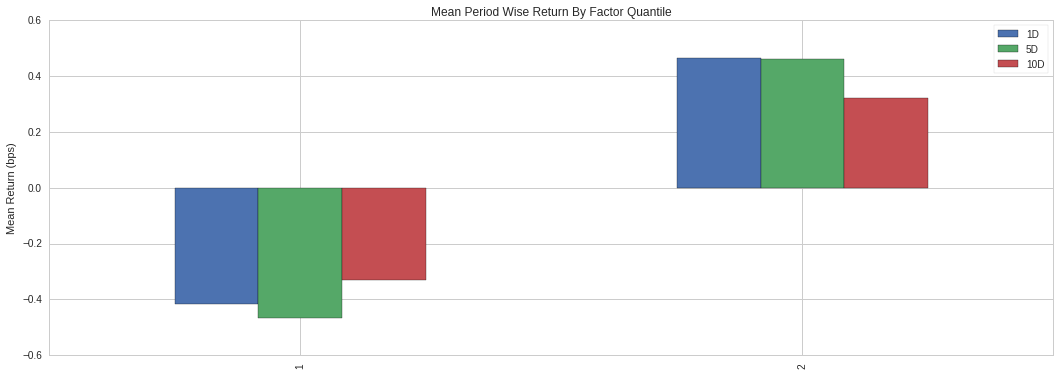

In [65]:
# ⇑を描画
al.plotting.plot_quantile_returns_bar(
    mean_return_by_q.apply(
        al.utils.rate_of_return,
        axis=0,
        args=('1D',)
    )
)

+ 試しに、5日間保有するして、その場合の累積収益を見る

In [71]:
# ファクターでウェイト付けしたロングショートのポートフォリオを収益を算出
ls_factor_returns = al.performance.factor_returns(factor_data)


In [72]:
ls_factor_returns.head()

,1D,5D,10D
date,,,
2013-01-02 00:00:00+00:00,-0.001861,-0.003358,-0.004709
2013-01-03 00:00:00+00:00,-0.000148,-0.000685,0.000333
2013-01-04 00:00:00+00:00,0.001578,0.001987,0.003974
2013-01-07 00:00:00+00:00,-0.000126,0.000671,0.003121
2013-01-08 00:00:00+00:00,0.000677,-0.000741,-0.002236


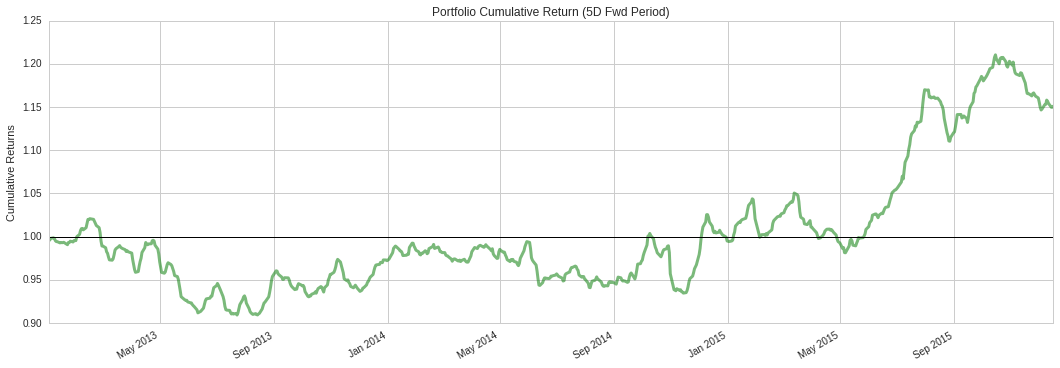

In [74]:
# 5日間保有した場合の累積収益を描画
al.plotting.plot_cumulative_returns(
    ls_factor_returns['5D'], 
    '5D', # period 
    freq=pd.tseries.offsets.BDay()
)

+ この結果をみて：
    + ドローダウンが大きい
    + コスト、マーケットインパクトまだ考えていない
+ **【結論】有望ではない**
+ チュートリアルなのでこのままの戦略でバックテストに入ります
+ https://www.quantopian.com/algorithms

### [1.7. Algorithm API](https://quantopian-doc.readthedocs.io/ja/latest/tutorial/1_getting_started_lesson5.html), [1.8. アルゴリズムにおけるデータ処理](https://quantopian-doc.readthedocs.io/ja/latest/tutorial/1_getting_started_lesson6.html), [1.9. ポートフォリオマネジメント](https://quantopian-doc.readthedocs.io/ja/latest/tutorial/1_getting_started_lesson7.html), [1.10. リスクマネジメント](https://quantopian-doc.readthedocs.io/ja/latest/tutorial/1_getting_started_lesson7.html#id2)




下記のコードは、`Research > Algorithm > New Algorithm` でエディタを開き、貼り付けて実行して下さい。

```python 
# Algorithm API インポート
import quantopian.algorithm as algo

# Optimize API インポート
# ファクターを使ってポートフォリオを組み上げていくときに、指定された制約条件を考慮した上で
# リターンを最大化するお手伝いをしてくれるライブラリ
# ユーザーはポジションサイズやレバレッジの制約ルールなどを渡すだけであとはこのライブラリがいい感じに
# ファクターに従ってポートフォリオを構築してくれる
import quantopian.optimize as opt

# Pipeline  インポート
from quantopian.pipeline import Pipeline
from quantopian.pipeline.data.psychsignal import stocktwits
from quantopian.pipeline.factors import SimpleMovingAverage

# built-in universe と Risk API method インポート
from quantopian.pipeline.filters import QTradableStocksUS
from quantopian.pipeline.experimental import risk_loading_pipeline


def initialize(context):
    # 制約パラメータ
   
    context.max_leverage = 1.0
    context.max_pos_size = 0.015
    context.max_turnover = 0.95

    # data pipelines を取り付ける
    algo.attach_pipeline(
        make_pipeline(),
        'data_pipe'
    )
    algo.attach_pipeline(
        risk_loading_pipeline(),
        'risk_pipe'
    )

    # rebalance 関数をスケジュール
    algo.schedule_function(
        rebalance,
        algo.date_rules.week_start(),
        algo.time_rules.market_open(),
    )


def before_trading_start(context, data):
    # pipeline出力を取得し、contextに格納する。
    context.pipeline_data = algo.pipeline_output('data_pipe')

    context.risk_factor_betas = algo.pipeline_output('risk_pipe')


# Pipeline definition
# Researchで構築したデータパイプラインをアルゴリズムに統合
def make_pipeline():

    sentiment_score = SimpleMovingAverage(
        inputs=[stocktwits.bull_minus_bear],
        window_length=3,
        # filtering 
        mask=QTradableStocksUS() 
    )

    return Pipeline(
        columns={
            'sentiment_score': sentiment_score,
        },
        # つまり、sentiment_scoreが null ではない銘柄は全部投資対象に入れる
        screen=sentiment_score.notnull()
    )


def rebalance(context, data):
    # pipeline 出力から alpha を取り出す
    alpha = context.pipeline_data.sentiment_score

    if not alpha.empty:
        # MaximizeAlpha objective 作成
        # alpha（つまりsentiment_score）でウェイトをつける
        objective = opt.MaximizeAlpha(alpha)

        # ポジションサイズ制約
        # with_equal_bounds を使うと、どんなに小さなalphaであってもポートフォリオに組み込む
        # という設定。つまり大きなalphaの銘柄に大きく偏ったポートフォリオにならない。
        constrain_pos_size = opt.PositionConcentration.with_equal_bounds(
            -context.max_pos_size, # min
            context.max_pos_size # max 
        )

        # ターゲットポートフォリオレバレッジ制約
        # ポートフォリオのウェイトが、max_leverage 以下になるように制約
        max_leverage = opt.MaxGrossExposure(context.max_leverage)

        # ロング（買い持ち）とショート（売り持ち）のサイズをだいたい同じに合わせる
        dollar_neutral = opt.DollarNeutral()

        # ポートフォリオの出来高の制約
        # MaxTurnoverに関するドキュメントがないのでなんだか良くわからない
        # どうしてDocがないの？という質問がForumにあった。
        # https://www.quantopian.com/posts/optimize-api-maxturnover-constraint-is-it-supported#5a3be89765ca177fe452db6d
        # 答えも不明瞭
        max_turnover = opt.MaxTurnover(context.max_turnover)

        # ターゲットポートフォリオのリスクエクスポージャーを制限する。
        
        # 2casa さんのありがたい教えによると（https://github.com/tokyoquantopian/TQUG6_20181215/blob/master/TQUG6_04-01.%E3%82%A2%E3%83%AB%E3%82%B4%E3%83%AA%E3%82%BA%E3%83%A0%E3%81%AB%E3%82%88%E3%82%8B%E3%83%90%E3%83%83%E3%82%AF%E3%83%86%E3%82%B9%E3%83%88.ipynb)
        # アルファ以外のファクターを取らないようにすることで、純粋に自分が意図するファクターにのみ
        # 投資を行っていることを保証するため、リスクモデルエクスポージャ制約を入れる
        # ということ。
        # デフォルト値は、セクターエクスポージャーの最大値は0.2
        # スタイルエクスポージャーの最大値は0.4
        factor_risk_constraints = opt.experimental.RiskModelExposure(
            context.risk_factor_betas,
            # 将来のリリースで RiskModelExposure のデフォルトが変更された場合にも対応。デフォルト設定もopt.Newest
            version=opt.Newest 
        )

        # 目的関数と制約リストを使ってポートフォリオをリバランスする
        algo.order_optimal_portfolio(
            objective=objective,
            constraints=[
                constrain_pos_size,
                max_leverage,
                dollar_neutral,
                max_turnover,
                factor_risk_constraints,
            ]
        )
```        

### [1.11. バックテスト で分析する — Quantopian 日本語翻訳プロジェクト ドキュメント](https://quantopian-doc.readthedocs.io/ja/latest/tutorial/1_getting_started_lesson8.html)

+ 上記コードを `FullBacktest` したあとに、"Notebook"タブをクリック
